# **Installing Part of the Project**

In [30]:

#Installing Tensorflow
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.3 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


# **Connect Drive**

In [38]:
#Connecting Colab with Drive
#I use this source for here https://www.youtube.com/watch?v=ls47CPFU1vE&t=323s
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
#Checking drive is in list or not
!ls

drive  sample_data


## **Dataset**

In [40]:
#I used Kaggle dataset and import here
import os
os.environ['KAGGLE_CONFIG_DIR'] =   "/content/drive/MyDrive/Colab Notebooks/kagglle api"

In [19]:
#Checking dataset is here or not
%cd '/content/drive/MyDrive/Colab Notebooks/kagglle api'

/content/drive/MyDrive/Colab Notebooks/kagglle api


In [ ]:
#Downloading the dataset
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition

100% 1.98G/1.98G [00:31<00:00, 63.5MB/s]
100% 1.98G/1.98G [00:31<00:00, 66.9MB/s]


In [41]:
import os

#List only subfolder names in the specified directory
directory = "/content/drive/MyDrive/Colab Notebooks/kagglle api/train"

# List only subfolder names
for root, dirs, files in os.walk(directory):
    for dir_name in dirs:
        print(dir_name)  # Printing only the folder name




apple
cabbage
carrot
chilli pepper
corn
cucumber
eggplant
garlic
grapes
lemon
lettuce
onion
pineapple
potato
spinach
tomato


# **Importing Libraries**

In [42]:
#Import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


# **Training Image preprocessing**

In [56]:
#Loads the image dataset from the specified directory and returns it in TensorFlow dataset format.
#I use this code in this source https://keras.io/api/data_loading/image/#image_dataset_from_directory-function
training_data = tf.keras.utils.image_dataset_from_directory(
        "/content/drive/MyDrive/Colab Notebooks/kagglle api/train",
        labels="inferred",
        label_mode="categorical",
        class_names=None,
        color_mode="rgb",
        batch_size=32,
        image_size=(64, 64),
        shuffle=True,
        seed=None,
        validation_split=None,
        subset=None,
        interpolation="bilinear",
        follow_links=False,
        crop_to_aspect_ratio=False,
    )

Found 1424 files belonging to 16 classes.


# **Validation Image Preprocessing**

In [55]:
#Use it to test the accuracy and performance of the model
validation_data = tf.keras.utils.image_dataset_from_directory(
        "/content/drive/MyDrive/Colab Notebooks/kagglle api/validation",
        labels="inferred",
        label_mode="categorical",
        class_names=None,
        color_mode="rgb",
        batch_size=32,
        image_size=(64, 64),
        shuffle=True,
        seed=None,
        validation_split=None,
        subset=None,
        interpolation="bilinear",
        follow_links=False,
        crop_to_aspect_ratio=False,
    )

Found 156 files belonging to 16 classes.


# **Building Model**

In [57]:
#Creating a model using the Sequential() class used to create a model in TensorFlow Keras
cnn = tf.keras.models.Sequential()

In [58]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [59]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [60]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


In [61]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [62]:
cnn.add(tf.keras.layers.Flatten())

In [63]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [64]:
cnn.add(tf.keras.layers.Dense(units=16, activation='softmax'))

In [65]:
#Compiling and Training
cnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [66]:
#Training our dataset
#Approximately It takes half an hour
training_history=cnn.fit(x=training_data, validation_data= validation_data, epochs=15)

Epoch 1/15
45/45 [==============================] - 227s 4s/step - loss: 15.5368 - accuracy: 0.0787 - val_loss: 2.7562 - val_accuracy: 0.0962
Epoch 2/15
45/45 [==============================] - 70s 1s/step - loss: 3.1625 - accuracy: 0.0709 - val_loss: 2.7379 - val_accuracy: 0.1026
Epoch 3/15
45/45 [==============================] - 66s 1s/step - loss: 3.2292 - accuracy: 0.0836 - val_loss: 2.7343 - val_accuracy: 0.0897
Epoch 4/15
45/45 [==============================] - 66s 1s/step - loss: 2.7936 - accuracy: 0.1250 - val_loss: 2.5346 - val_accuracy: 0.1731
Epoch 5/15
45/45 [==============================] - 70s 1s/step - loss: 2.7953 - accuracy: 0.1440 - val_loss: 2.4032 - val_accuracy: 0.2500
Epoch 6/15
45/45 [==============================] - 66s 1s/step - loss: 3.3999 - accuracy: 0.2114 - val_loss: 2.2573 - val_accuracy: 0.3013
Epoch 7/15
45/45 [==============================] - 68s 1s/step - loss: 2.4052 - accuracy: 0.2507 - val_loss: 2.0818 - val_accuracy: 0.3205
Epoch 8/15
45/45 [

# **Saving Model**

In [67]:
#Saving our model
cnn.save('trained_model2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [68]:
#dictionary containing the history of metrics obtained during training (e.g., loss and accuracy)
training_history.history

{'loss': [15.536770820617676,
  3.162515640258789,
  3.2292449474334717,
  2.79363751411438,
  2.795346975326538,
  3.3998875617980957,
  2.405240774154663,
  2.28041410446167,
  2.290313959121704,
  1.8416539430618286,
  1.8297386169433594,
  1.6030066013336182,
  1.308814287185669,
  1.2595763206481934,
  1.0352524518966675],
 'accuracy': [0.07865168899297714,
  0.0709269642829895,
  0.08356741815805435,
  0.125,
  0.14396066963672638,
  0.2113763988018036,
  0.25070226192474365,
  0.300561785697937,
  0.3448033630847931,
  0.42696627974510193,
  0.4606741666793823,
  0.5224719047546387,
  0.5926966071128845,
  0.6432584524154663,
  0.7001404762268066],
 'val_loss': [2.7562289237976074,
  2.737881898880005,
  2.734328031539917,
  2.5345888137817383,
  2.4032087326049805,
  2.2572686672210693,
  2.0818443298339844,
  1.9064706563949585,
  2.344268321990967,
  1.925465703010559,
  1.391662836074829,
  1.095575213432312,
  1.051481008529663,
  0.9971022009849548,
  0.5078142881393433],


In [69]:
#Open the history file
import json
with open('training_hist.json', 'w') as f:
  json.dump(training_history.history,f)

In [70]:
#Accuracy of model on validation set
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 91.02563858032227 %


# **Accuracy Visualization**

## **Training Visualization**

<function matplotlib.pyplot.show(close=None, block=None)>

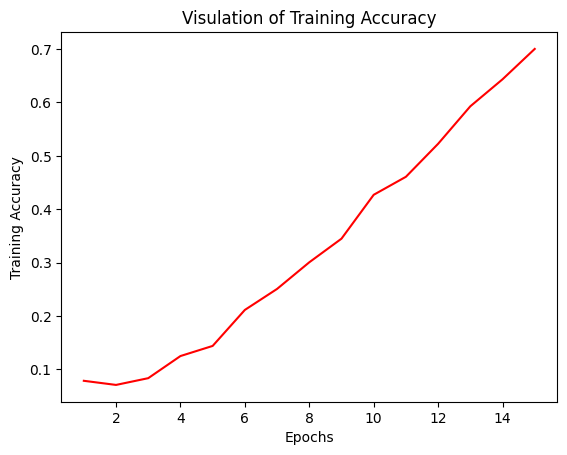

In [171]:
#Accuracy Visualization for Training
epochs = [i for i in range(1,16)]
plt.plot(epochs, training_history.history['accuracy'], color='red')
plt.xlabel("Epochs")
plt.ylabel("Training Accuracy")
plt.title("Visulation of Training Accuracy")
plt.show

## **Validation Accuracy**

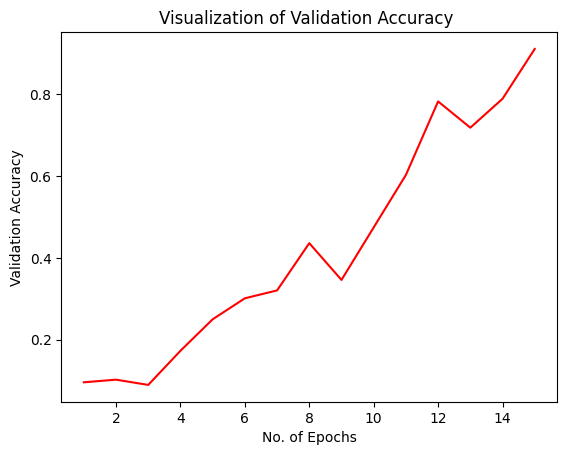

In [172]:


plt.plot(epochs,training_history.history['val_accuracy'],color='red')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy ')
plt.show()

# **Test Set Image Processing**

In [164]:

test_set = tf.keras.utils.image_dataset_from_directory(
        "/content/drive/MyDrive/Colab Notebooks/kagglle api/test",
        labels="inferred",
        label_mode="categorical",
        class_names=None,
        color_mode="rgb",
        batch_size=32,
        image_size=(64, 64),
        shuffle=True,
        seed=None,
        validation_split=None,
        subset=None,
        interpolation="bilinear",
        follow_links=False,
        crop_to_aspect_ratio=False,
    )

Found 160 files belonging to 16 classes.


In [ ]:
#Model Testing

# **Loading Model**

In [72]:
#Using trained model
cnn=tf.keras.models.load_model("/content/trained_model2.h5")

# **Visualising and Performing Prediction**

<function matplotlib.pyplot.show(close=None, block=None)>

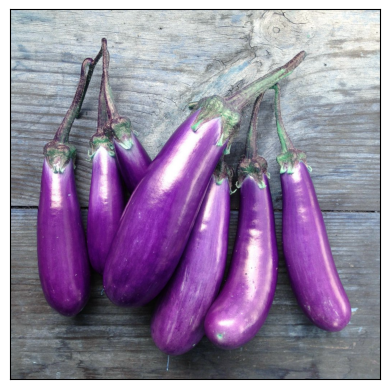

In [173]:
#Load the test image, after showing this image
import cv2
image_path = '/content/drive/MyDrive/Colab Notebooks/kagglle api/test/eggplant/Image_6.jpg'
img = cv2.imread(image_path)
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show

# **Testing Model**

In [174]:
#uploading an image file feeds this image to a pre-trained CNN model, which classifies it and makes predictions about the image.
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
predictions = cnn.predict(input_arr)
print(predictions)

1/1 [==============================] - 0s 54ms/step
[[5.0553672e-11 7.7343403e-09 5.4847658e-11 2.6930993e-09 1.1001533e-10
  1.5371415e-09 9.9992120e-01 3.4584468e-07 3.7053615e-05 2.6986624e-13
  4.1319268e-05 2.1130386e-10 7.0750933e-11 5.2432819e-11 8.4743332e-12
  1.1663771e-13]]


In [175]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

5/5 [==============================] - 7s 130ms/step - loss: 0.5109 - accuracy: 0.9062
Test accuracy: 0.90625


In [176]:
#Printing number of prediction index
result = np.where(predictions[0] == max(predictions[0]))
print(result[0])

[6]


In [177]:
#Printing the result
print("It is a {}".format(test_set.class_names[result[0][0]]))

It is a eggplant


# **Import OpenAi**

In [13]:
!pip install openai


In [18]:
!pip install openai==0.28



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 1.3 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.6.1
    Uninstalling openai-1.6.1:
      Successfully uninstalled openai-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.


# **Food Suggestion**

In [178]:
import openai

# API KEY
api_key = "api-key"
openai.api_key = api_key

# Getting the name of the predicted fruit or vegetable
predicted_food = (test_set.class_names[result[0][0]])


# Giving nice prompt for gpt
previous_text = f"You are an expert cook of Turkish dishes and the predicted food is {predicted_food}. Can you give us a good food suggestion? "

#Get recipe suggestion using the line Completion API
response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "system", "content": previous_text},
        {"role": "user", "content": "Suggest a recipe based on the predicted food"}
    ]
)

#Printing the suggest
print(response['choices'][0]['message']['content'])

Sure! A delicious Turkish dish that features eggplant is called Imam Bayildi. It is a traditional stuffed eggplant dish that is packed with flavor. Here's a recipe for you:

Ingredients:
- 4 medium-sized eggplants
- 1 onion, finely chopped
- 3 garlic cloves, minced
- 2 tomatoes, peeled and diced
- 1 green bell pepper, diced
- 1/4 cup chopped fresh parsley
- 1/4 cup chopped fresh mint
- 1/4 cup olive oil
- Salt and pepper to taste

Instructions:
1. Preheat the oven to 375°F (190°C).
2. Cut the eggplants in half lengthwise and scoop out the flesh, leaving a 1/2 inch thick shell. Finely chop the scooped out flesh.
3. Heat half of the olive oil in a pan over medium heat. Add the chopped eggplant, onion, and garlic, and sauté until softened, about 5 minutes.
4. Add the diced tomatoes, green bell pepper, parsley, mint, salt, and pepper to the pan. Cook for another 5 minutes until the vegetables are tender and the flavors are well combined.
5. Brush the eggplant shells with the remaining oliv